In [61]:
import nbimporter
import Dataset as Dataset
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

from torchvision import transforms
import os


import python_file.dataclass as StreetSign
import python_file.function as Function
import python_file.network as Network


In [62]:
model = Network.MiniAlexNetV2()
model.load_state_dict(torch.load('modelli\minialexnetV2_dataset-10.pth'))
model.eval()

MiniAlexNetV2(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): ReLU()
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=4096, out_features=2048, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1

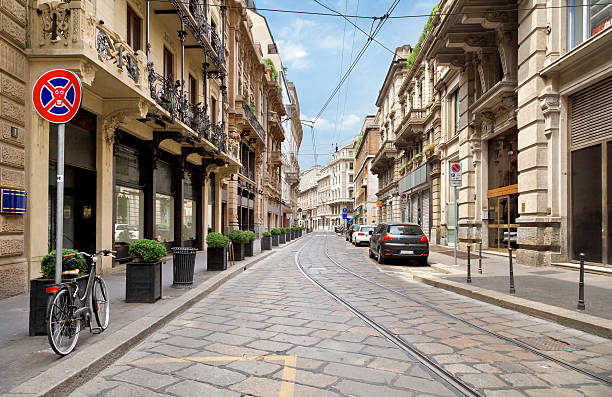

In [63]:
img = Image.open("image\images.png")
img


In [64]:
transform = transforms.Compose([transforms.Resize(32),transforms.ToTensor()])
img_t = transform(img)

In [65]:
# Definisci le dimensioni di input previste dal tuo modello
input_height = 32
input_width = 32

# Applica le trasformazioni alle dimensioni desiderate
preprocess = transforms.Compose([
    transforms.Resize((input_height, input_width)),
    transforms.ToTensor(),  # Converte l'immagine in un tensore PyTorch
])

img_t = preprocess(img)  # Ora img_tensor è un tensore PyTorch valido

# Assicurati che img_tensor sia 4D (batch_size, canali, altezza, larghezza)
img_t = img_t.unsqueeze(0)  # Aggiunge una dimensione di batch

# Seleziona solo i primi 3 canali (RGB)
img_t = img_t[:, :3, :, :]

# Ora puoi passare img_tensor al modello
output = model(img_t)

In [66]:
pred = output
print("CNN predictions: ", output)

CNN predictions:  tensor([[ 4.6462e-01,  1.6778e+00,  6.7187e-01, -2.9639e-02,  3.2717e-03,
         -5.0882e-02, -1.6214e-02, -3.9041e-02, -4.9773e-02, -7.7982e-02,
         -2.5937e-02, -2.6645e-02, -3.8358e-02, -4.6977e-02, -3.4613e-02,
          1.1556e-02, -7.5697e-02, -6.0810e-03, -3.0591e-02, -2.4121e-02,
         -4.3664e-02, -2.0519e-03, -4.9668e-03, -4.1278e-02, -2.5737e-02,
         -4.1755e-02, -4.2137e-02, -4.4695e-02, -4.4183e-02, -6.4269e-02,
         -4.4614e-03, -2.7479e-02, -5.2008e-02, -5.3385e-02, -1.2149e-02,
         -5.9240e-02, -2.1258e-02, -8.5534e-02, -5.7284e-02, -7.1685e-02,
         -1.8192e-02, -4.1289e-02,  5.2571e-03, -2.0596e-02, -3.8029e-02,
         -3.9057e-02, -4.1270e-02, -3.6026e-02, -7.9646e-02, -4.8072e-02,
         -5.3200e-02, -4.2355e-02, -3.4648e-02, -6.3351e-02, -4.8606e-03,
          8.0383e-03,  3.0100e-02,  2.4387e-04, -3.4837e-02, -5.7135e-02,
         -4.3522e-02, -1.2090e-02, -1.7167e-02, -7.4330e-02, -6.2207e-03,
         -1.2581e-03

In [67]:
pred_dict = pred[0]

# Estrai le informazioni di interesse dal tensore
boxes = pred[:, :4]  # Le prime 4 colonne potrebbero rappresentare i bounding box
labels = pred[:, 4]  # La quinta colonna potrebbe rappresentare le etichette
scores = pred[:, 5:]  # Le colonne dalla sesta in poi potrebbero rappresentare gli score

# Converti i tensori PyTorch in numpy arrays
boxes = boxes.detach().numpy()
labels = labels.detach().numpy()
scores = scores.detach().numpy()


print("Predizione con lo score più alto: \n bounding box:\t ", boxes[0], "\n Classe:\t", labels[0], "\n score:\t", scores[0])

Predizione con lo score più alto: 
 bounding box:	  [ 0.46461737  1.6777577   0.67187345 -0.02963896] 
 Classe:	 0.003271711 
 score:	 [-0.05088173 -0.01621376 -0.03904055 -0.04977279 -0.07798186 -0.02593673
 -0.02664505 -0.03835822 -0.04697729 -0.03461269  0.01155555 -0.0756973
 -0.00608102 -0.03059086 -0.0241207  -0.04366394 -0.00205191 -0.00496681
 -0.04127789 -0.02573669 -0.04175479 -0.04213729 -0.04469521 -0.04418296
 -0.0642693  -0.00446137 -0.0274788  -0.05200822 -0.05338471 -0.01214893
 -0.05923992 -0.021258   -0.0855343  -0.05728439 -0.07168512 -0.01819216
 -0.04128915  0.0052571  -0.02059555 -0.03802895 -0.03905679 -0.04126968
 -0.03602631 -0.07964628 -0.04807221 -0.05320001 -0.04235542 -0.03464758
 -0.06335051 -0.00486061  0.00803826  0.0301004   0.00024387 -0.03483694
 -0.05713506 -0.043522   -0.01208951 -0.01716683 -0.07433031 -0.00622068
 -0.00125809  0.01014445 -0.06531619 -0.01331122 -0.02105089  0.02894541
 -0.03952923 -0.03761295 -0.03710971 -0.00419167 -0.03465693 -0

In [72]:
threshold = 0.000005
idx = np.where(scores > threshold)[0]
boxes = boxes[idx]
labels = labels[idx]
scores = scores[idx]

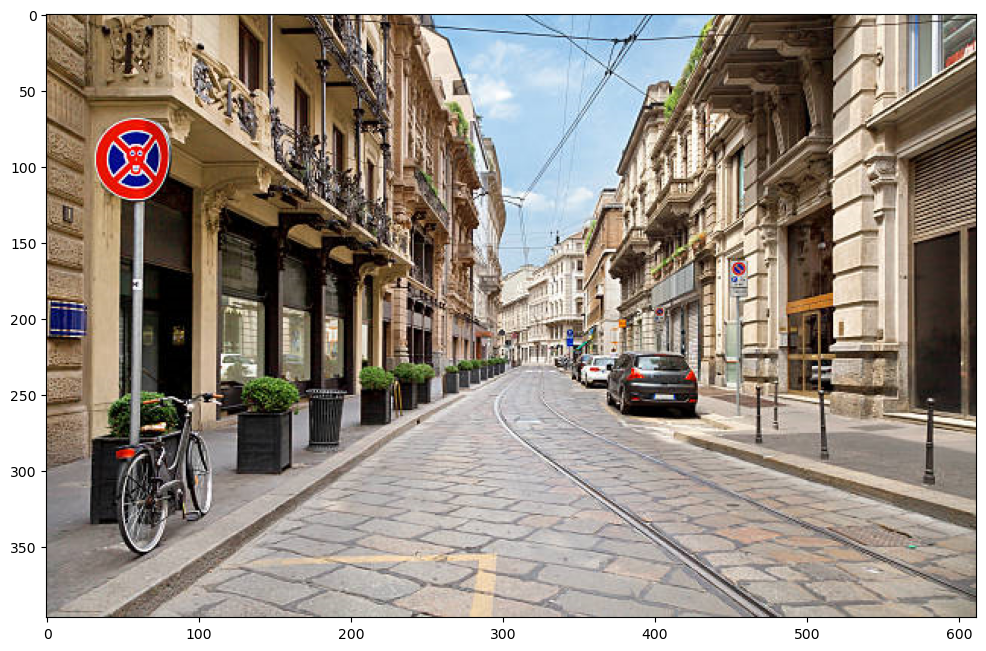

In [73]:
plt.figure(figsize=(12,8))
plt.imshow(img)
ax = plt.gca()
for box, label, score in zip(boxes, labels, scores):
    x1, y1, x2, y2 = box
    w = x2 - x1
    h = y2 - y1
    if isinstance(label, (list, np.ndarray)):
        label = label[0]  # Se label è un array, prendi il primo elemento

    if isinstance(score, (list, np.ndarray)):
        score = score[0]  # Se score è un array, prendi il primo elemento

    label = int(label)  # Converti l'etichetta in un intero
    ax.add_patch(plt.Rectangle((x1, y1), w, h, fill=False, color="red"))
    ax.text(x1, y1, "Class {}: {:.2f}".format(label, score), fontsize=15, color="white", bbox=dict(facecolor="red", alpha=0.5))

plt.show()

In [74]:
category_map = {
    1: 'indication',
    2: 'prohibitory',
    3: 'warning'
}

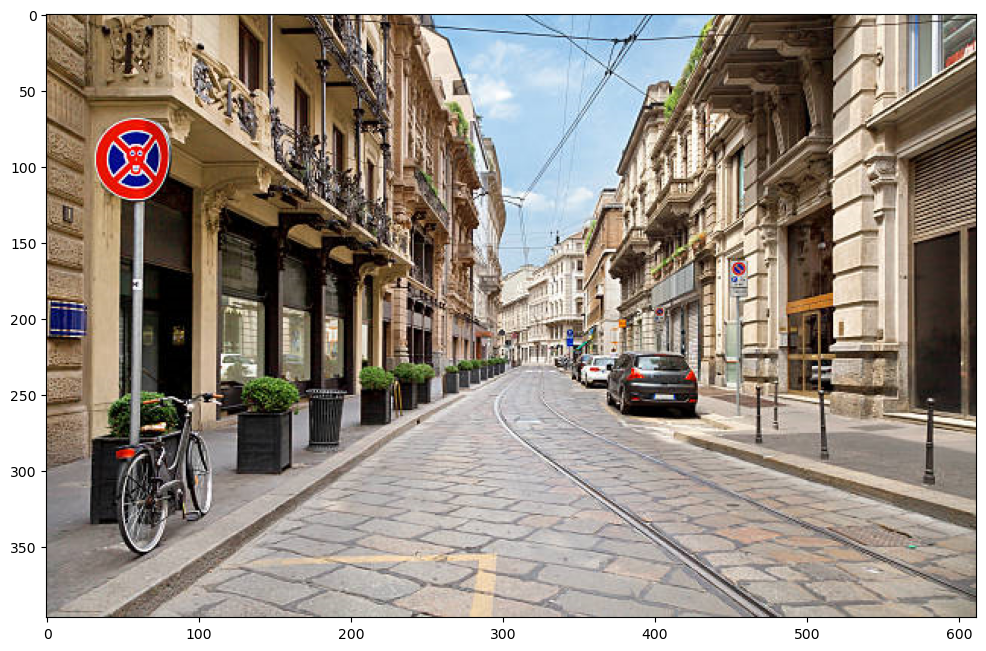

In [75]:
plt.figure(figsize=(12,8))
plt.imshow(img)
ax = plt.gca()
for box, label, score in zip(boxes, labels, scores):
    x1, y1, x2, y2 = box
    w = x2 - x1
    h = y2 - y1
    rect = plt.Rectangle((x1, y1), w, h, fill=False, color="red")
    ax.add_patch(rect)
    ax.text(x1, y1, f"{category_map[label]}: {score:.2f}", fontsize=15, color="white", bbox=dict(facecolor="red", alpha=0.5))
plt.show()